# CSE256 - Final Project

In [4]:
import classifier
import interpretation
from importlib import reload

In [34]:
reload(classifier)
clf = classifier.Classifier()
clf.predict_sentiment("not bad")

array([0.22641331])

## Interpretation

In [36]:
reload(interpretation)

text = "not bad"
ii = interpretation.Interpretation(clf, text)
ii.decorated_text

[('not', 'negative'),
 ('bad', 'negative'),
 ('↔', 'neutral'),
 ('lol', 'positive')]

## Unigram Bigram Hover Tooltip

In [226]:
reload(interpretation)
text = "hover not bad"
ii = interpretation.Interpretation(clf, text)

In [227]:
expanded_text = list(ii.valid_ngrams(ii.wt_text))

In [228]:
list(ii.valid_ngrams(ii.wt_text))

['hover', 'hover not', 'not', 'not bad', 'bad', '']

In [229]:
text = "not bad"

list(ii.compact_interpret), list(ii.expanded_interpret)

([('hover', '0', 'neutral'),
  ('not', '-0.7007', 'negative'),
  ('bad', '-0.6818', 'negative')],
 [('hover', '0', 'neutral'),
  ('not', '-0.8732', 'negative'),
  ('↔', '0.3450', 'positive'),
  ('bad', '-0.8543', 'negative'),
  ('', '0', 'neutral')])

In [230]:
ii.format_score(0.01)

'0.0100'

In [231]:
ii.classify_token("hover")

'neutral'

In [232]:
ii.score("hover"), ii.score("hover") != 0

(0.0, False)

## Sarcasm Detection

In [5]:
from classifier import SentimentClassifier, SarcasmClassifier

In [8]:
sentiment_clf = SentimentClassifier()
sarcasm_clf = SarcasmClassifier()

In [14]:
text = "just so happy"
sentiment_clf.predict_sentiment(text), sarcasm_clf.predict_sentiment(text)

(array([0.54389056]), array([0.74373336]))

In [16]:
sarcasm_interpretation = interpretation.Interpretation(sarcasm_clf, text)

In [17]:
sarcasm_interpretation.vocab_dict

defaultdict(float,
            {'!': 0.0357216055157736,
             '! !': 0.047538520489635694,
             '! #': 0.3855945774728141,
             '! &': -0.33443536286001835,
             "! ''": -0.3759216681591191,
             '! (': 0.08073336904312475,
             '! .': 0.047644322983648804,
             '! ...': 0.4958644073792424,
             '! 1': -0.04822708783008577,
             '! :': -0.15365770589524316,
             '! ;': 0.18150387607760032,
             '! ?': 0.0437389787536588,
             '! @': -0.18986468195513903,
             '! ``': 0.2125259473513269,
             '! a': -0.14830966360956932,
             '! and': -0.07338344515822215,
             '! but': 0.30184228702023325,
             '! ca': 0.10560022844060624,
             '! get': -0.011779434880736262,
             '! go': -0.24135802142011017,
             '! haha': -0.005670479419596933,
             '! http': -0.04334201271494533,
             '! https': -0.2470040981013299,
         

In [26]:
from nltk import TweetTokenizer, word_tokenize

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
?CountVectorizer

In [28]:
TweetTokenizer("I'm great!")

In [27]:
word_tokenize("I'm great!")

['I', "'m", 'great', '!']

In [22]:
TweetTokenizer().tokenize("I'm great!")

["I'm", 'great', '!']

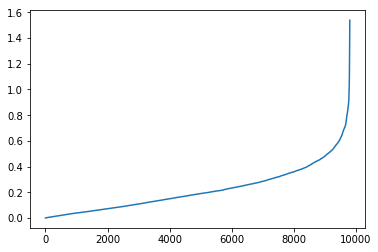

In [39]:
import matplotlib.pyplot as plt

plt.plot(sorted(abs(sarcasm_clf.clf.coef_[0])))
plt.show()

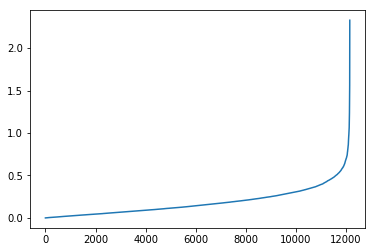

In [40]:
# min(abs(sentiment_clf.clf.coef_[0]))
plt.plot(sorted(abs(sentiment_clf.clf.coef_[0])))
plt.show()